In [54]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import seaborn as sns; sns.set()

### Реализация алгоритма Кнута - Морриса-Прата (КМП)

In [2]:
#aabcad
#010010
def prefix_table(string):
    """На вход принимает строчку
    Выводит mas (len(string)) выводящий 
    для каждого элемента значение префикс функции"""
    prefix_count = 0
    mas = [0]*len(string)
    for i in range(1, len(string)):
        if string[i] == string[prefix_count]:
            prefix_count +=1
        else:
            prefix_count = 0
        mas[i] = prefix_count
    return mas


In [14]:
def KMP(text, pattern ):
    """Ищет подстроки в строке и выводит массив
    Выводит массив расположений подстроки в тексте
    Асимптотика поиска O(N+M)"""
    shifts = prefix_table(pattern)
    initial_point = []
    m = 0; n = 0
    while n < len(text):
        if text[n] == pattern[m]:
            m += 1; n += 1
        else:
            m = shifts[m-1]   #начинаем не с первого считать, а со смещением, тот же элемент
        if m == len(pattern):
            initial_point.append(n-m)
            m = shifts[m-1]
        elif m == 0:         #на первом ошибка
            n += 1
    return initial_point




In [15]:
# Пример кода
A = "asdddadsfasfsdasdfasdaasfgafsgsdaqs"
A = A
sub = "sf"
index_KMP = KMP(A, sub)
index_KMP

[7, 10, 23]

### Реализация алгоритма Рабина Карпа (RK)
##### Реализация хеш функции
  
  
$ hash(p[1:m+1])=\sum_{i=1}^m p[i]x^{m-i} mod(q)$



In [22]:
def RK(A, sub, d=257, q=40):
    """Ищет подстроки в строке и выводит массив
    Выводит массив расположений подстроки в тексте
    Использует hash
    Асимптотика поиска O(N+M) Зависит от коллизий
    """
    n = len(A)
    m = len(sub)
    h = pow(d,m-1)%q
    result = []
    p = 0 # хеш для паттерна
    t = 0 # хеш для подстроки
    for i in range(m): # Получаем начальные значения хеша для паттерна и подстроки
        p = (d*p+ord(sub[i]))%q
        t = (d*t+ord(A[i]))%q
    
    for s in range(n-m+1): 
        if p == t: # Побуквенная проверка
            match = True
            for i in range(m):
                if sub[i] != A[s+i]:
                    match = False
                    break
            if match:
                result.append(s)
        if s < n-m: # Пересчитываем хеш для подстроки
            t = (t-h*ord(A[s]))%q # удаляем первый
            t = (t*d+ord(A[s+m]))%q # добавляем следующий

    return result

In [31]:
# Работает ли?
A = "asdddadsfasfsdasdfasdaasfgafsgsdaqs"
A = A*10
sub = "fasfsdas"
index_RK = RK(A, sub)
index_KMP = KMP(A, sub)
print(index_RK,'\n', index_KMP)
print(index_RK == index_KMP)

#Дают тот же ответ. Ура!!!

[8, 43, 78, 113, 148, 183, 218, 253, 288, 323] 
 [8, 43, 78, 113, 148, 183, 218, 253, 288, 323]
True


### Сравнения KMP vs RK для китайского языка
1. Сделаем функцию замеряющую время
2. Считаем данные с файла
3. Построим зависимость времени вычисления от длины текста
4. Построим зависимость времени вычисления от длины подстроки
5. Сравним зависимости


In [39]:
def meusure_time(fun, A, sub, lenghts = [1000]):
    """Функция вычисляющая время работы алгоритма
       для текста разного размера
       Выводит массив со временем(в секундах)"""
    mas = []
    N = 3 # по какому брать среднее
    
    for i in tqdm(lenghts): # progress bar
        interval = 0
        for j in range(N):
            start_time = time.time()
            fun(A[:i], sub)
            end_time = time.time()
            interval += end_time - start_time
        mas.append((interval)/N)
    return mas



In [48]:
import codecs
file = codecs.open( "Chinese.txt", 'r',"utf-8" )
data = file.read() # len = 25507
file.close()


500000


In [101]:
# Работаем с массивом текста и подстроки

data = data*20
data = data[:500000]
data = data*2
#data = data # 2550700
sub= '每个地主必须养着几个外国人作保护者'

print(len(data), len(sub))

1000000 17


In [52]:
index_KMP =KMP(data, sub)
index_RK =RK(data, sub)
print(len(index_KMP), len(index_KMP))
print(index_KMP==index_RK)

79 79
True


### Зависимость времени от длины текста(при len(sub) = 5)

In [104]:
k = 1000
lenghts = [i for i in range(100*k, 1000*k, 100*k)]
mas = meusure_time(RK, data, sub, lenghts)
mas2 = meusure_time(KMP, data, sub, lenghts)



100%|████████████████████████████████████████████| 9/9 [00:09<00:00,  1.46s/it]


Text(0.5, 1.0, 'Сравнение KMP vs RK при len(pattern) = 17')

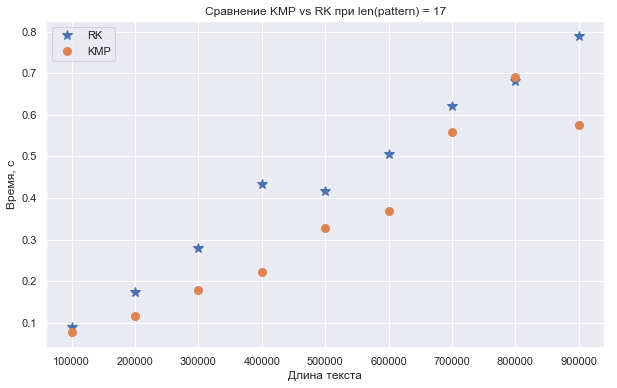

In [105]:

plt.figure(figsize = (10,6))
plt.plot(lenghts, mas, '*', label='RK', ms=10)
plt.plot(lenghts, mas2, 'o', label ='KMP', ms=8)
plt.xlabel('Длина текста'); plt.ylabel('Время, c')
plt.legend()
plt.title('Сравнение KMP vs RK при len(pattern) = 17')

In [120]:
sub = data[10:1000]
sub_str = []
k = 0
for i in range(100, len(sub)+1, 100):
    sub_str.append(sub[:i])

print(len(sub_str)) # до 1000 элементов через 100



9


In [133]:
mas1 = []
mas2 = []
lenghts = [800*k]
print((meusure_time(RK,data, sub, lenghts)))


    

  0%|                                                    | 0/1 [00:00<?, ?it/s]


IndexError: string index out of range

NameError: name 'mas_2' is not defined

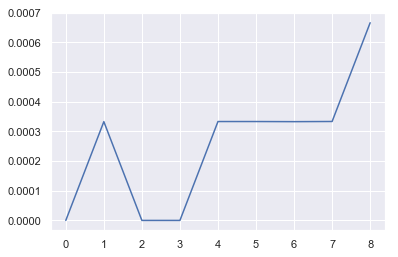

In [126]:
plt.plot(mas2)
